# Libraries and datasets

In [1]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt

import re

In [10]:
births = pd.read_csv('../data/processed/totDF_dwnsmpl_clean.csv')

In [ ]:
births_nou = births.loc[births['admit_NICU'] != 'U']

In [3]:
colnames = np.array(births.columns)
colnames

array(['Unnamed: 0', 'birth_year', 'birth_month', 'birth_time',
       'birth_day_of_wk', 'birth_place', 'mothers_age_imputed',
       'mothers_age', 'mothers_nativity', 'mothers_residence_status',
       'mothers_race', 'mothers_race_imputed', 'mothers_hispanic_origin',
       'mothers_hispanic_origin2', 'paternity_acknow',
       'mothers_marital_status', 'mothers_maristat_imputed',
       'mothers_education', 'fathers_age', 'fathers_race',
       'fathers_hispanic_origin', 'fathers_hispanic_origin2',
       'fathers_education', 'prior_living_births', 'prior_dead_births',
       'prior_terminations', 'mo_since_last_live_birth',
       'mo_since_last_other_birth', 'mo_prenatal_care_began',
       'n_prenatal_visits', 'wic', 'cigs_tri1', 'cigs_tri2', 'cigs_tri3',
       'mothers_height', 'mothers_bmi', 'pre_preg_lbs', 'delivery_lbs',
       'pre_preg_diab', 'gest_diab', 'pre_preg_hypten', 'gest_hypten',
       'hypten_ecl', 'prev_preterm_birth', 'infertility_treatment',
       'fertil_

## Functions

In [21]:
def pct_bplot(dataframe, group = str, target = 'admit_NICU', columns_titles = ['Y','N'] ):
    df1 = dataframe.groupby([group])[[target]].count()
    df2 =  dataframe.groupby([group])[target].value_counts().unstack()
    df2 = df2.reindex(columns=columns_titles)
    df3 = pd.merge(df1,df2, left_index = True, right_index = True)
    pct_df = pd.DataFrame(list(map(lambda x: df3[x]/df3[target] * 100, df3.columns[1:])))
    pct_df = pct_df.T
    pct_df.plot(kind = 'bar', stacked = True)

In [5]:
def plot_gpYR(df,col,xlab,ylab,title,kind='line'):
    groupDF = df.groupby('birth_year')[col].value_counts().unstack()
    plt.figure(figsize=(20,20))
    groupDF.plot(kind=kind,logy=True, legend=True)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    return

In [93]:
def val_check(data_frame, column_name = str):
    df = pd.DataFrame(data_frame)
    col = column_name
    print( "Value counts of %s \n" %(col), df[col].value_counts())
    print("Value counts of %s by year \n" %(col), df.groupby(['birth_year'])[col].value_counts())

# Visualizations


## NICU admittance

<Figure size 1440x1440 with 0 Axes>

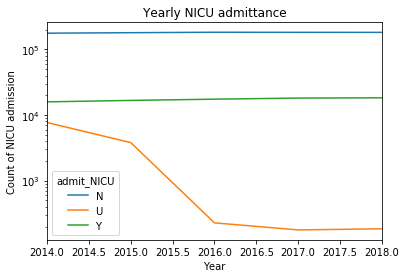

In [7]:
#NICU admiitance time series, 2014-2018
births['admit_NICU'] = births['admit_NICU'].replace(' ', 'U')
plot_gpYR(births,'admit_NICU',"Year","Count of NICU admission", "Yearly NICU admittance",kind='line')

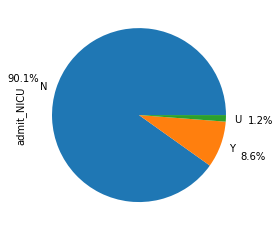

In [9]:
#NICU admit pie chart, all year (2014-2018)
births['admit_NICU'].value_counts().plot(kind = 'pie', autopct='%1.1f%%', pctdistance = 1.4)

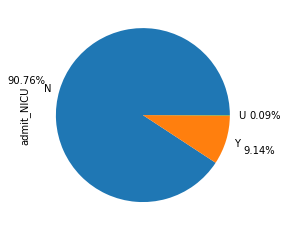

In [12]:
#NICU admit pie chart, year (2018) only
births.loc[births['birth_year']==2018]['admit_NICU'].value_counts().plot(kind = 'pie', autopct='%1.2f%%', pctdistance = 1.4)

## Mother health files

### Mother's BMI

In [48]:
births['mother_bmi_recode'] = pd.cut(births['mothers_bmi'],[10.0,19.0, 25.0,30.0,35.0,40.0,90.0], labels = ['u','h','o','ob1','ob2','ob3'])

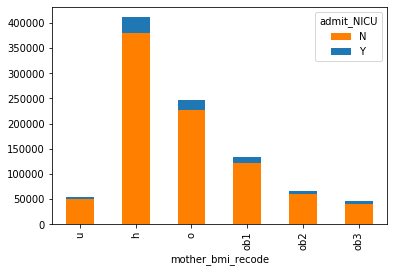

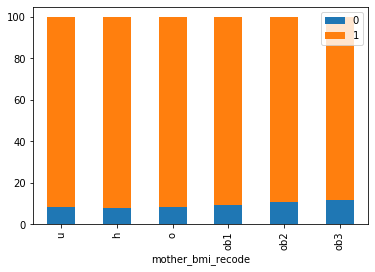

In [65]:
bmi_plt = births.loc[births['admit_NICU'] != 'U'].groupby(['mother_bmi_recode'])['admit_NICU'].value_counts().unstack()
bmi_plt.plot(kind = 'bar', stacked = True, color = ['#ff7f00','#1f77b4'])
pct_bplot(births,'mother_bmi_recode')

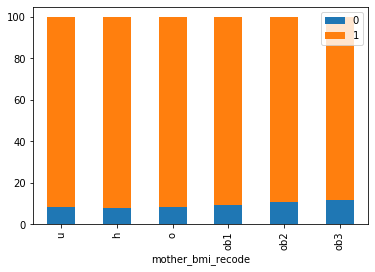

In [50]:
pct_bplot(births,'mother_bmi_recode')

## Mother's Age

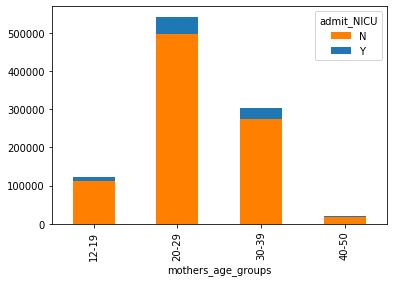

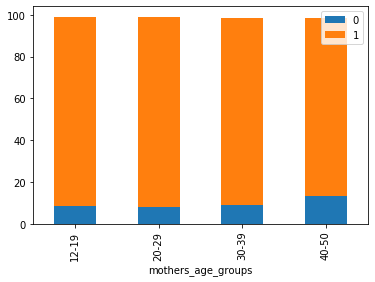

In [69]:
births['mothers_age_groups']= pd.cut(births['mothers_age'], 4, labels = ['12-19', '20-29', '30-39','40-50'])
bmi_plt = births.loc[births['admit_NICU'] != 'U'].groupby(['mothers_age_groups'])['admit_NICU'].value_counts().unstack()
bmi_plt.plot(kind = 'bar', stacked = True, color = ['#ff7f00','#1f77b4'])
pct_bplot(births,'mothers_age_groups')

In [84]:
births['mothers_age'].max()

50

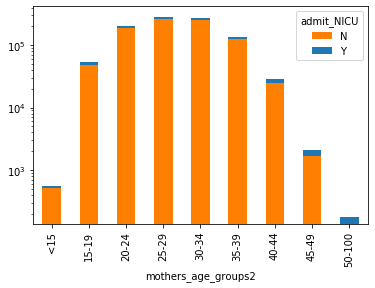

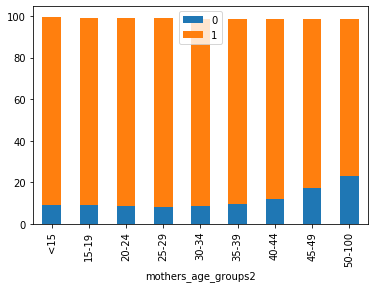

In [86]:
births['mothers_age_groups2']= pd.cut(births['mothers_age'], [0,14,19,24,29,34,39,44,49,100],
                                     labels = ['<15', '15-19', '20-24','25-29','30-34','35-39','40-44','45-49','50-100'])
bmi_plt = births.loc[births['admit_NICU'] != 'U'].groupby(['mothers_age_groups2'])['admit_NICU'].value_counts().unstack()
bmi_plt.plot(kind = 'bar', logy = True, stacked = True, color = ['#ff7f00','#1f77b4'])
pct_bplot(births,'mothers_age_groups2')

## Prior-termination births

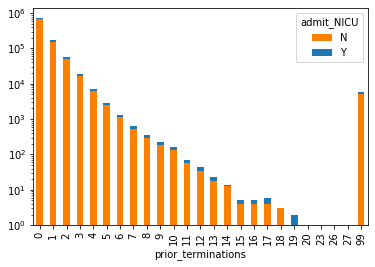

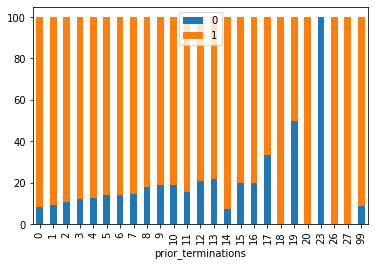

In [90]:
pter_plt = births_nou.groupby(['prior_terminations'])['admit_NICU'].value_counts().unstack()
pter_plt.plot(kind = 'bar', logy = True, stacked = True, color = ['#ff7f00','#1f77b4'])
pct_bplot(births_nou,'prior_terminations')

# Prior living births

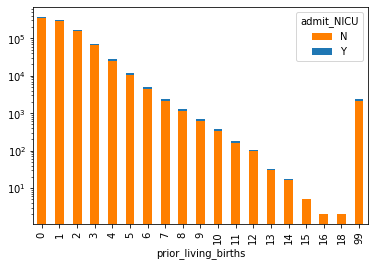

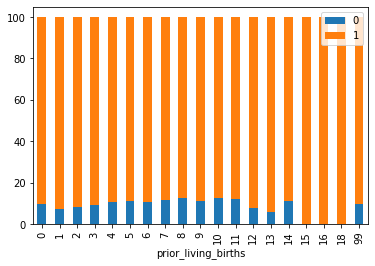

In [91]:
plive_plt = births_nou.groupby(['prior_living_births'])['admit_NICU'].value_counts().unstack()
plive_plt.plot(kind = 'bar', logy = True, stacked = True, color = ['#ff7f00','#1f77b4'])
pct_bplot(births_nou,'prior_living_births')

## Prior Dead births

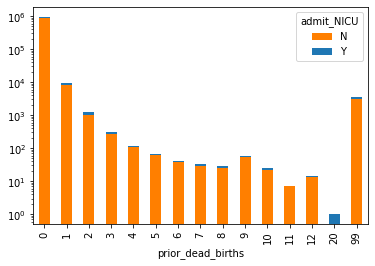

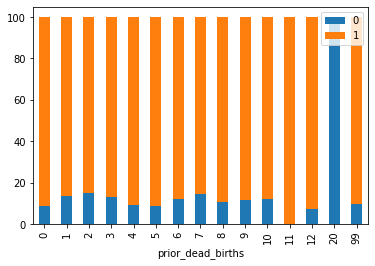

In [92]:
pdead_plt = births_nou.groupby(['prior_dead_births'])['admit_NICU'].value_counts().unstack()
pdead_plt.plot(kind = 'bar', logy = True, stacked = True, color = ['#ff7f00','#1f77b4'])
pct_bplot(births_nou,'prior_dead_births')

## time from last pregnancy


Value counts of mo_since_last_live_birth 
 888    377567
999     46430
3       13309
22      13098
24      12997
        ...  
283         5
299         5
297         4
291         3
295         2
Name: mo_since_last_live_birth, Length: 300, dtype: int64
Value counts of mo_since_last_live_birth by year 
 birth_year  mo_since_last_live_birth
2014        888                         75201
            999                         14735
            3                            2667
            24                           2465
            22                           2428
                                        ...  
2018        284                             1
            287                             1
            292                             1
            296                             1
            299                             1
Name: mo_since_last_live_birth, Length: 1474, dtype: int64


(array([523297.,  49174.,   3532.,      0.,      0.,      0.,      0.,
             0., 377567.,  46430.]),
 array([  3. , 102.6, 202.2, 301.8, 401.4, 501. , 600.6, 700.2, 799.8,
        899.4, 999. ]),
 <a list of 10 Patch objects>)

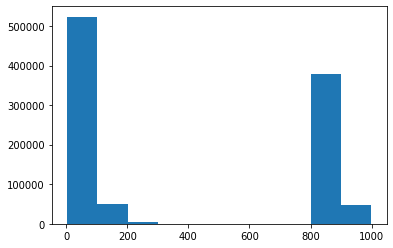

In [96]:
#Since last other birth
val_check(births,'mo_since_last_live_birth')
plt.hist(births['mo_since_last_live_birth'])

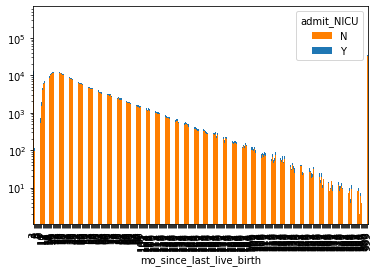

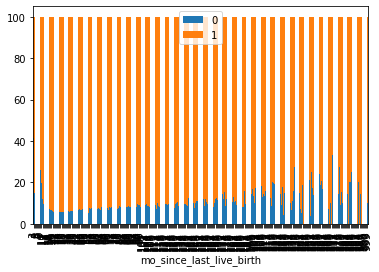

In [98]:
#Need to regroup somehows
mo_live_plt = births_nou.groupby(['mo_since_last_live_birth'])['admit_NICU'].value_counts().unstack()
mo_live_plt.plot(kind = 'bar', logy = True, stacked = True, color = ['#ff7f00','#1f77b4'])
pct_bplot(births_nou,'mo_since_last_live_birth')

Value counts of mo_since_last_other_birth 
 999    469681
888    432090
11       5206
12       5177
10       4404
        ...  
290         2
289         2
297         1
294         1
285         1
Name: mo_since_last_other_birth, Length: 300, dtype: int64
Value counts of mo_since_last_other_birth by year 
 birth_year  mo_since_last_other_birth
2014        888                          142173
            999                           26659
            12                             1680
            11                             1673
            13                             1352
                                          ...  
2018        286                               1
            287                               1
            289                               1
            295                               1
            298                               1
Name: mo_since_last_other_birth, Length: 862, dtype: int64


(array([ 87139.,   9884.,   1206.,      0.,      0.,      0.,      0.,
             0., 432090., 469681.]),
 array([  3. , 102.6, 202.2, 301.8, 401.4, 501. , 600.6, 700.2, 799.8,
        899.4, 999. ]),
 <a list of 10 Patch objects>)

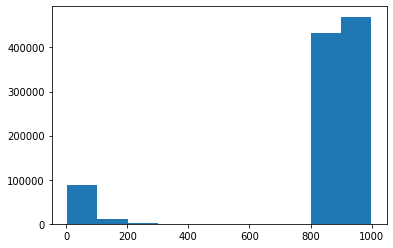

In [97]:
#Since last other birth
val_check(births,'mo_since_last_other_birth')
plt.hist(births['mo_since_last_other_birth'])

# Diabetes

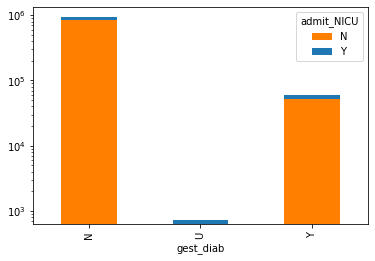

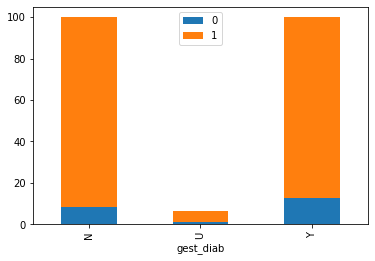

In [99]:
gestdiab_plt = births_nou.groupby(['gest_diab'])['admit_NICU'].value_counts().unstack()
gestdiab_plt.plot(kind = 'bar', logy = True, stacked = True, color = ['#ff7f00','#1f77b4'])
pct_bplot(births,'gest_diab')

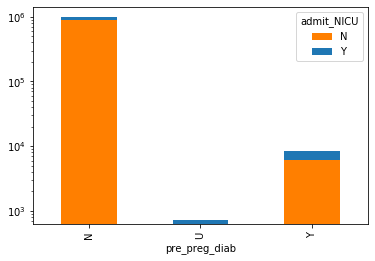

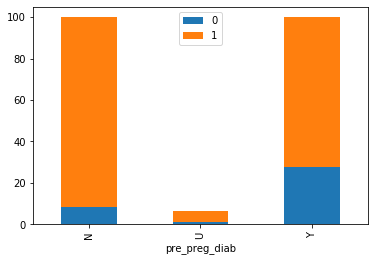

In [101]:
prepregdiab_plt = births_nou.groupby(['pre_preg_diab'])['admit_NICU'].value_counts().unstack()
prepregdiab_plt.plot(kind = 'bar', logy = True, stacked = True, color = ['#ff7f00','#1f77b4'])
pct_bplot(births,'pre_preg_diab')

## Prenatal visits

Value counts of n_prenatal_visits 
 12    153969
10    133310
11     95245
13     92034
14     79508
       ...  
71         1
69         1
51         1
64         1
66         1
Name: n_prenatal_visits, Length: 76, dtype: int64
Value counts of n_prenatal_visits by year 
 birth_year  n_prenatal_visits
2014        12                   30330
            10                   26850
            11                   17922
            13                   17549
            14                   15545
                                 ...  
2018        53                       1
            54                       1
            55                       1
            76                       1
            84                       1
Name: n_prenatal_visits, Length: 296, dtype: int64


(array([2.54044e+05, 6.80452e+05, 2.46010e+04, 2.58300e+03, 5.64000e+02,
        4.60000e+01, 1.20000e+01, 5.00000e+00, 4.00000e+00, 3.76890e+04]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <a list of 10 Patch objects>)

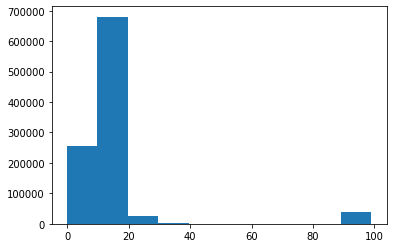

In [103]:
val_check(births,'n_prenatal_visits')
plt.hist(births['n_prenatal_visits'])

In [ ]:
births['mothers_age_groups2']= pd.cut(births['mothers_age'], [0,14,19,24,29,34,39,44,49,100],
                                     labels = ['<15', '15-19', '20-24','25-29','30-34','35-39','40-44','45-49','50-100'])
bmi_plt = births.loc[births['admit_NICU'] != 'U'].groupby(['mothers_age_groups2'])['admit_NICU'].value_counts().unstack()
bmi_plt.plot(kind = 'bar', logy = True, stacked = True, color = ['#ff7f00','#1f77b4'])
pct_bplot(births,'mothers_age_groups2')

In [87]:
colnames

array(['Unnamed: 0', 'birth_year', 'birth_month', 'birth_time',
       'birth_day_of_wk', 'birth_place', 'mothers_age_imputed',
       'mothers_age', 'mothers_nativity', 'mothers_residence_status',
       'mothers_race', 'mothers_race_imputed', 'mothers_hispanic_origin',
       'mothers_hispanic_origin2', 'paternity_acknow',
       'mothers_marital_status', 'mothers_maristat_imputed',
       'mothers_education', 'fathers_age', 'fathers_race',
       'fathers_hispanic_origin', 'fathers_hispanic_origin2',
       'fathers_education', 'prior_living_births', 'prior_dead_births',
       'prior_terminations', 'mo_since_last_live_birth',
       'mo_since_last_other_birth', 'mo_prenatal_care_began',
       'n_prenatal_visits', 'wic', 'cigs_tri1', 'cigs_tri2', 'cigs_tri3',
       'mothers_height', 'mothers_bmi', 'pre_preg_lbs', 'delivery_lbs',
       'pre_preg_diab', 'gest_diab', 'pre_preg_hypten', 'gest_hypten',
       'hypten_ecl', 'prev_preterm_birth', 'infertility_treatment',
       'fertil_